In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data
dataFileName1 = os.path.join("Data", "ES_locations_with_NUTS_Nova.dta")
dataFileName2 = os.path.join("Data", "stackoecdmatch_Nova.dta")
dataFileName3 = os.path.join("Data", "stack_OECD_merge_ES_Nova.dta")
city_data_spain = pd.read_stata(dataFileName1)
stackoverflow_activity= pd.read_stata(dataFileName2)
merged_programming_data = pd.read_stata(dataFileName3)

# Explore city_data_spain:

This dataset provides detailed location-based data, specifically for Spain. It dives deep into the poster's locations from a platform like Stack Overflow down to the city level. The data also associates these locations with European Union's NUTS codes and provides demographic details such as urbanization degree, coastal area information, and population size. Serves to enrich the stackoverflow_activity dataset to provide a more granular information.

In [3]:
# Get the first 10 rows of the dataset
city_data_spain.head(10)

,posterlocationcity,posterlocationregion,posterlocationcountrycode,country,state,city,NUTS3CODE,LAUCODE,LAUNAMENATIONAL,LAUNAMELATIN,CHANGEyesno,POPULATION,TOTALAREAm2,DEGURBA,DEGchangecomparedtolastyear,COASTALAREAyesno,COASTchangecomparedtolastye,NUTS3_NAME,_merge_status
0,A Coruña,"Galicia,A Coruña",ES,ES,"Galicia,A Coruña",A Coruña,,,,,,NaN,NaN,NaN,,,,,Master only (1)
1,A Estrada,"Galicia,Pontevedra",ES,ES,"Galicia,Pontevedra",A Estrada,,,,,,NaN,NaN,NaN,,,,,Master only (1)
2,A Guarda,"Galicia,Pontevedra",ES,ES,"Galicia,Pontevedra",A Guarda,,,,,,NaN,NaN,NaN,,,,,Master only (1)
3,A Pobra do Caraminal,"Galicia,A Coruña",ES,ES,"Galicia,A Coruña",A Pobra do Caraminal,,,,,,NaN,NaN,NaN,,,,,Master only (1)
4,A Rua,"Galicia,Ourense",ES,ES,"Galicia,Ourense",A Rua,,,,,,NaN,NaN,NaN,,,,,Master only (1)
5,Abades,"Castille and León,Segovia",ES,ES,"Castille and León,Segovia",Abades,ES416,40001,Abades,Abades,no,NaN,31979972.0,3.0,no,no,no,Segovia,Matched (3)
6,Abadino,"Basque Country,Biscay",ES,ES,"Basque Country,Biscay",Abadino,,,,,,NaN,NaN,NaN,,,,,Master only (1)
7,Abanilla,"Murcia,Murcia",ES,ES,"Murcia,Murcia",Abanilla,ES620,30001,Abanilla,Abanilla,no,NaN,235618100.0,3.0,no,no,no,Murcia,Matched (3)
8,Abaran,"Murcia,Murcia",ES,ES,"Murcia,Murcia",Abaran,,,,,,NaN,NaN,NaN,,,,,Master only (1)
9,Abegondo,"Galicia,A Coruña",ES,ES,"Galicia,A Coruña",Abegondo,ES111,15001,Abegondo,Abegondo,no,NaN,83896337.0,3.0,no,no,no,A Coruña,Matched (3)


In [4]:
# Get number of unique NUTS3 codes
city_data_spain['NUTS3CODE'].nunique()

60

In [5]:
# Display basic information about the dataset
city_data_spain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9470 entries, 0 to 9469
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   posterlocationcity           9470 non-null   object  
 1   posterlocationregion         9470 non-null   object  
 2   posterlocationcountrycode    9470 non-null   object  
 3   country                      9470 non-null   object  
 4   state                        9470 non-null   object  
 5   city                         9470 non-null   object  
 6   NUTS3CODE                    9470 non-null   object  
 7   LAUCODE                      9470 non-null   object  
 8   LAUNAMENATIONAL              9470 non-null   object  
 9   LAUNAMELATIN                 9470 non-null   object  
 10  CHANGEyesno                  9470 non-null   object  
 11  POPULATION                   0 non-null      float64 
 12  TOTALAREAm2                  8131 non-null   float64 
 13  DEG

In [6]:
# Summary statistics for numerical columns
city_data_spain.describe()

,POPULATION,TOTALAREAm2,DEGURBA
count,0.0,8.131000e+03,8131.000000
mean,NaN,6.207698e+07,2.810109
std,NaN,9.202715e+07,0.455229
min,NaN,2.578400e+04,1.000000
25%,NaN,1.841452e+07,3.000000
50%,NaN,3.486923e+07,3.000000
75%,NaN,6.886721e+07,3.000000
max,NaN,1.750229e+09,3.000000


In [7]:
# Check for missing values
missing_values = city_data_spain.isna().sum()
missing_values

posterlocationcity                0
posterlocationregion              0
posterlocationcountrycode         0
country                           0
state                             0
city                              0
NUTS3CODE                         0
LAUCODE                           0
LAUNAMENATIONAL                   0
LAUNAMELATIN                      0
CHANGEyesno                       0
POPULATION                     9470
TOTALAREAm2                    1339
DEGURBA                        1339
DEGchangecomparedtolastyear       0
COASTALAREAyesno                  0
COASTchangecomparedtolastye       0
NUTS3_NAME                        0
_merge_status                     0
dtype: int64

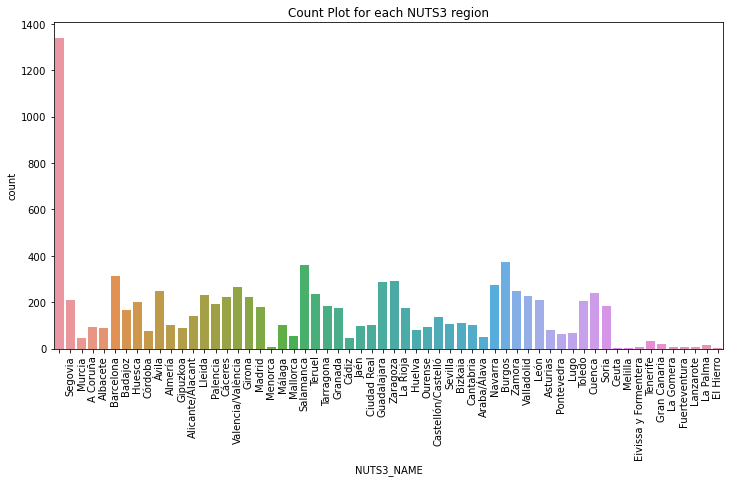

In [8]:
# Show the count for each NUTS3 region
plt.figure(figsize=(12, 6))
sns.countplot(x='NUTS3_NAME', data=city_data_spain)
plt.title('Count Plot for each NUTS3 region')
plt.xticks(rotation=90)
plt.show()

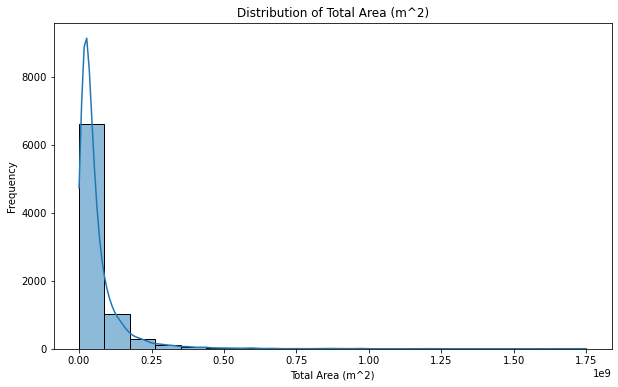

In [9]:
# Histogram of TOTALAREAm2
plt.figure(figsize=(10, 6))
sns.histplot(city_data_spain['TOTALAREAm2'].dropna(), bins=20, kde=True)
plt.title('Distribution of Total Area (m^2)')
plt.xlabel('Total Area (m^2)')
plt.ylabel('Frequency')
plt.show()

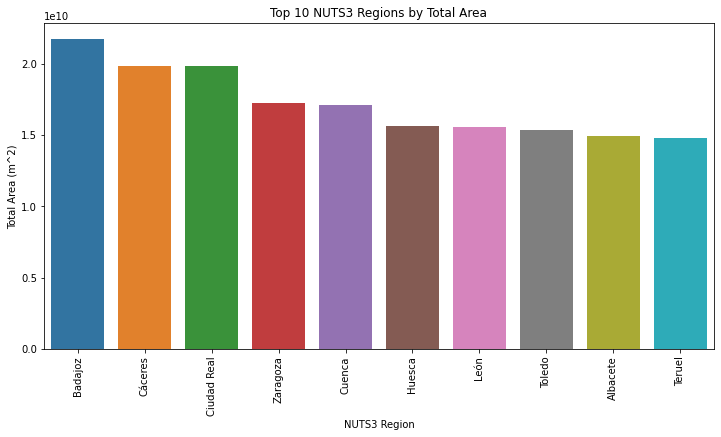

In [10]:
# Top N regions by total area
top_N = 10
top_regions = city_data_spain.groupby('NUTS3_NAME')['TOTALAREAm2'].sum().sort_values(ascending=False).head(top_N)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.index, y=top_regions.values)
plt.title('Top {} NUTS3 Regions by Total Area'.format(top_N))
plt.xlabel('NUTS3 Region')
plt.ylabel('Total Area (m^2)')
plt.xticks(rotation=90)
plt.show()



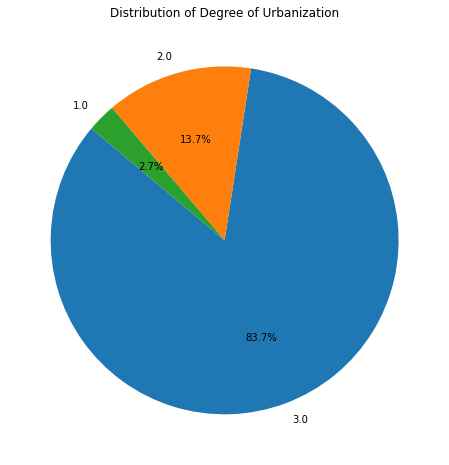

In [11]:
# Pie chart for DEGURBA
plt.figure(figsize=(8, 8))
city_data_spain['DEGURBA'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Degree of Urbanization')
plt.ylabel('')
plt.show()


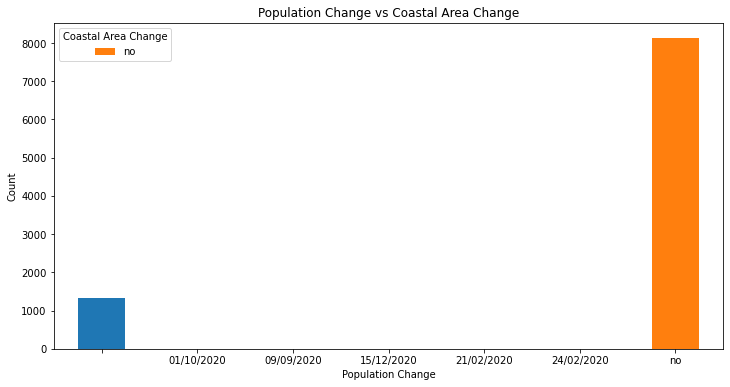

In [12]:
# Stacked bar chart for population change and coastal area change
cross_tab = pd.crosstab(city_data_spain['CHANGEyesno'], city_data_spain['COASTchangecomparedtolastye'])
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Population Change vs Coastal Area Change')
plt.xlabel('Population Change')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Coastal Area Change')
plt.show()


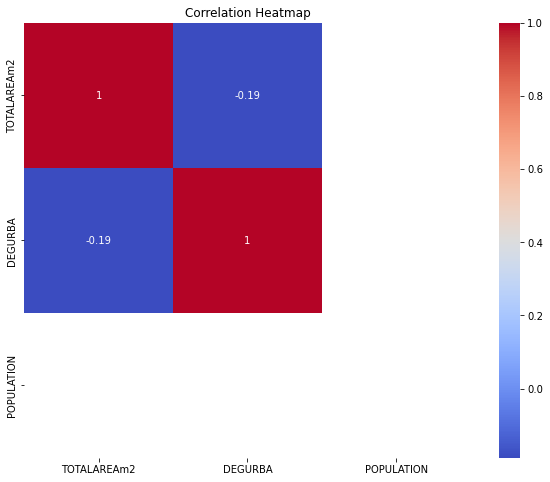

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(city_data_spain[['TOTALAREAm2', 'DEGURBA', 'POPULATION']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


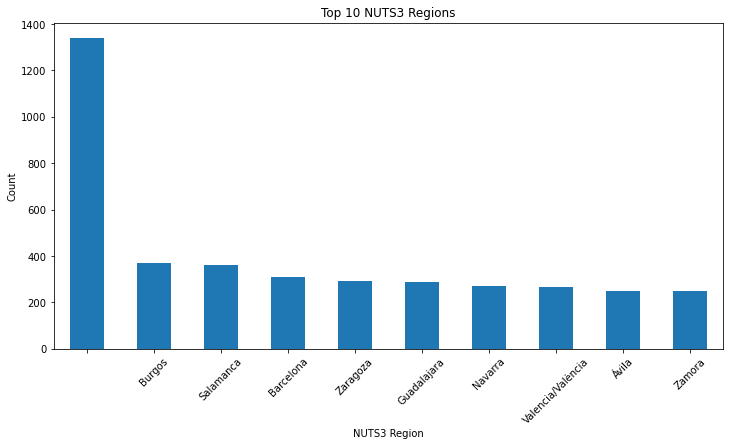

In [14]:
# Top N NUTS3 regions
top_n = 10

plt.figure(figsize=(12, 6))
city_data_spain['NUTS3_NAME'].value_counts().head(top_n).plot(kind='bar')
plt.title(f'Top {top_n} NUTS3 Regions')
plt.xlabel('NUTS3 Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Explore stackoverflow_activity:

This dataset bridges data from Stack Overflow with broader socio-economic indicators at the regional level within European countries. It integrates information on Stack Overflow activity (questions, answers, votes) for each region, combined with economic performance indicators (GVA) and demographic data (employment rates and total population).

| **Data** | **Description** |
| :--- | :---: |
| year | Indicates the year for which the respective data row is recorded. |
| nuts3_name | Refers to the NUTS (Nomenclature of Territorial Units for Statistics) level 3 name, which is a geocode standard by the European Union for referencing subdivisions of countries for statistical purposes. |
| country | The country to which the data pertains. |
| questioncount | Number of questions posted from the respective location. |
| answercount | Number of answers provided from that location. |
| upvotecount | Total upvotes received by posts from that location. |
| downvotecount | Total downvotes received by posts from that location. |
| commentcount | Number of comments made by users from that location. |
| EMP_Y15_64_ | Employment (15-64 years old)|
| EMP_Y15_MAX_ |Employment (15 years old and over)|
| GVA_CURR_PR_ | Gross Value Added at current prices. GVA is a measure of economic productivity. |
| GVA_REAL_PPP_ | Gross Value Added adjusted for Purchasing Power Parity. |
| GVA_REAL_PR_ | GVA at real prices, possibly adjusted for inflation. |
| GVA_USD_PPP_ | GVA in USD adjusted for Purchasing Power Parity. |
| POP_T | Total population. |


In [15]:
# Replace empty strings with NaN in the 'country' column
stackoverflow_activity['country'].replace('', np.nan, inplace=True)

# Drop rows where the 'country' column is empty (NaN)
stackoverflow_activity.dropna(subset=['country'], inplace=True)

# Get the first 10 rows of the dataset
stackoverflow_activity.head(10)

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,EMP_Y15_64_,EMP_Y15_MAX_,GVA_CURR_PR_,GVA_REAL_PPP_,GVA_REAL_PR_,GVA_USD_PPP_,POP_T
13,2000.0,Aargau,CH,0.0,0.0,0.0,0.0,0.0,NaN,296000.0,NaN,NaN,NaN,NaN,NaN
14,2001.0,Aargau,CH,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,543685.0
15,2002.0,Aargau,CH,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,550298.0
16,2003.0,Aargau,CH,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,555782.0
17,2004.0,Aargau,CH,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,560674.0
18,2005.0,Aargau,CH,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,565122.0
19,2006.0,Aargau,CH,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,569344.0
20,2007.0,Aargau,CH,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,574813.0
21,2008.0,Aargau,CH,86.0,167.0,0.0,0.0,32.0,NaN,NaN,37287.7,29942.4,37002.5,24974.2,581562.0
22,2009.0,Aargau,CH,370.0,2291.0,4158.0,265.0,3282.0,NaN,NaN,36599.6,29216.0,36104.8,24896.7,591632.0


In [16]:
# Get number of unique NUTS3 regions
stackoverflow_activity['nuts3_name'].nunique()

383

In [17]:
stackoverflow_activity.to_excel('output.xlsx', index=False)

In [18]:
# Display basic information about the dataset
stackoverflow_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8426 entries, 13 to 8438
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8426 non-null   float32
 1   nuts3_name     8426 non-null   object 
 2   country        8426 non-null   object 
 3   questioncount  8426 non-null   float64
 4   answercount    8426 non-null   float64
 5   upvotecount    8426 non-null   float64
 6   downvotecount  8426 non-null   float64
 7   commentcount   8426 non-null   float64
 8   EMP_Y15_64_    3375 non-null   float64
 9   EMP_Y15_MAX_   4578 non-null   float64
 10  GVA_CURR_PR_   6121 non-null   float64
 11  GVA_REAL_PPP_  6121 non-null   float64
 12  GVA_REAL_PR_   6121 non-null   float64
 13  GVA_USD_PPP_   6121 non-null   float64
 14  POP_T          7920 non-null   float64
dtypes: float32(1), float64(12), object(2)
memory usage: 1020.3+ KB


In [19]:
# Summary statistics for numerical columns
stackoverflow_activity.describe()

,year,questioncount,answercount,upvotecount,downvotecount,commentcount,EMP_Y15_64_,EMP_Y15_MAX_,GVA_CURR_PR_,GVA_REAL_PPP_,GVA_REAL_PR_,GVA_USD_PPP_,POP_T
count,8426.000000,8426.000000,8426.000000,8426.000000,8426.000000,8426.000000,3.375000e+03,4.578000e+03,6.121000e+03,6121.000000,6.121000e+03,6121.000000,7.920000e+03
mean,2010.495117,808.916449,1061.209233,4661.877047,551.208165,3321.685853,2.526516e+05,2.487114e+05,2.632518e+04,21797.642431,2.707465e+04,20567.112864,6.753715e+05
std,6.344669,3383.728177,4387.161503,21522.162578,2839.520689,14199.370459,3.531820e+05,2.895200e+05,7.708901e+04,39510.555609,7.653224e+04,37845.356544,9.678122e+05
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+03,7.000000e+03,3.060400e+02,603.330000,7.013400e+02,386.330000,1.497700e+04
25%,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.638250e+04,1.040000e+05,5.099500e+03,6177.450000,5.548360e+03,5749.540000,2.505592e+05
50%,2010.500000,51.000000,53.000000,150.000000,5.000000,132.500000,1.495460e+05,1.570555e+05,9.831000e+03,11268.200000,1.012060e+04,10600.200000,4.074450e+05
75%,2016.000000,461.750000,530.750000,2109.250000,136.000000,1512.000000,2.716670e+05,2.980750e+05,2.075110e+04,22317.000000,2.175070e+04,20984.600000,7.743610e+05
max,2021.000000,70818.000000,92307.000000,531337.000000,85568.000000,335536.000000,3.101900e+06,3.471400e+06,1.422720e+06,636921.000000,1.307410e+06,635693.000000,1.551930e+07


In [20]:
# Check for missing values
missing_values = stackoverflow_activity.isna().sum()
missing_values

year                0
nuts3_name          0
country             0
questioncount       0
answercount         0
upvotecount         0
downvotecount       0
commentcount        0
EMP_Y15_64_      5051
EMP_Y15_MAX_     3848
GVA_CURR_PR_     2305
GVA_REAL_PPP_    2305
GVA_REAL_PR_     2305
GVA_USD_PPP_     2305
POP_T             506
dtype: int64

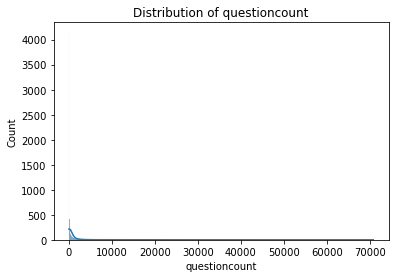

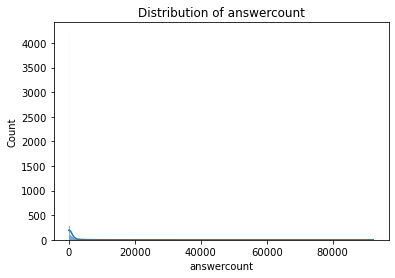

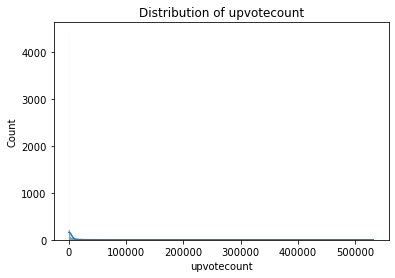

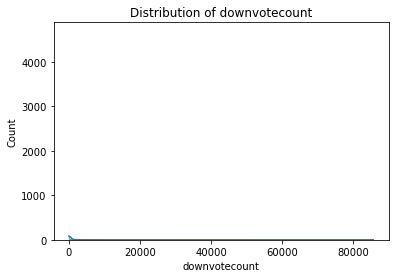

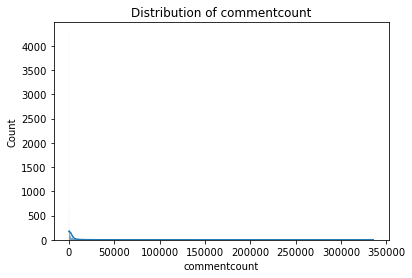

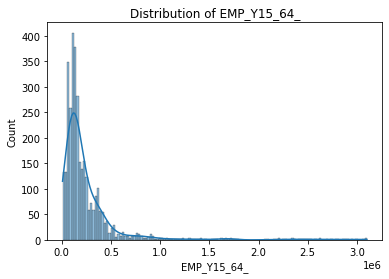

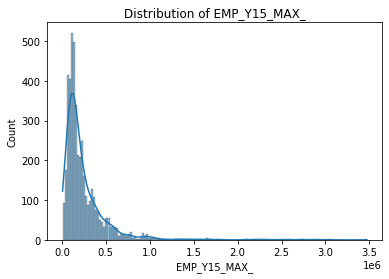

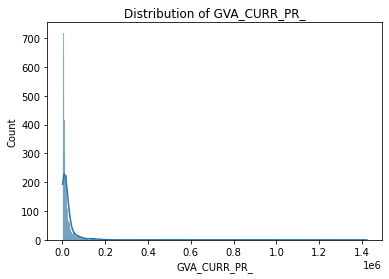

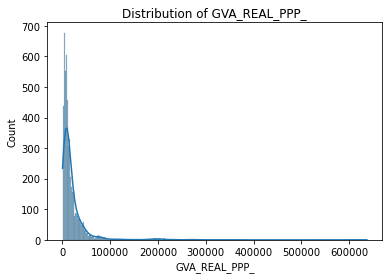

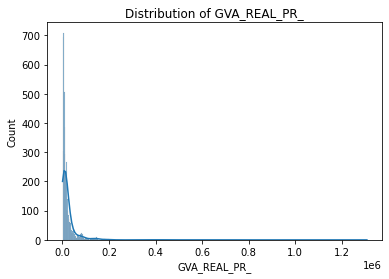

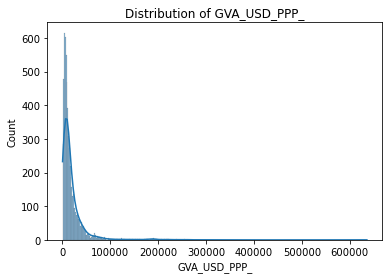

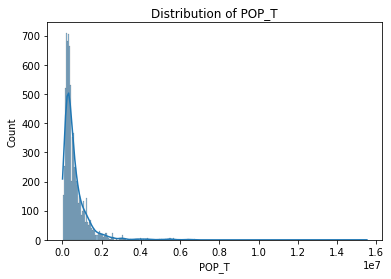

In [21]:
#Univariate Analysis for numerical dimensions
numerical_columns = ['questioncount', 'answercount', 'upvotecount', 'downvotecount', 'commentcount', 
                     'EMP_Y15_64_', 'EMP_Y15_MAX_', 'GVA_CURR_PR_', 'GVA_REAL_PPP_', 'GVA_REAL_PR_', 
                     'GVA_USD_PPP_', 'POP_T']

for column in numerical_columns:
    sns.histplot(stackoverflow_activity[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


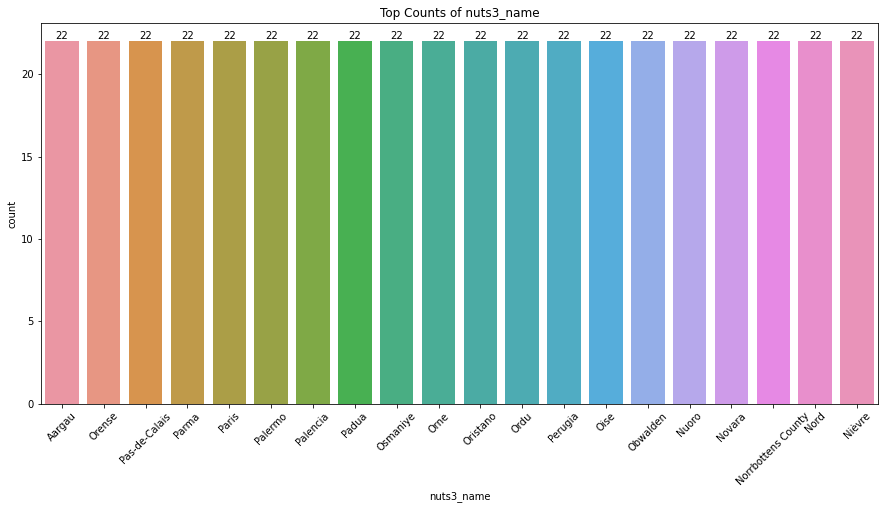

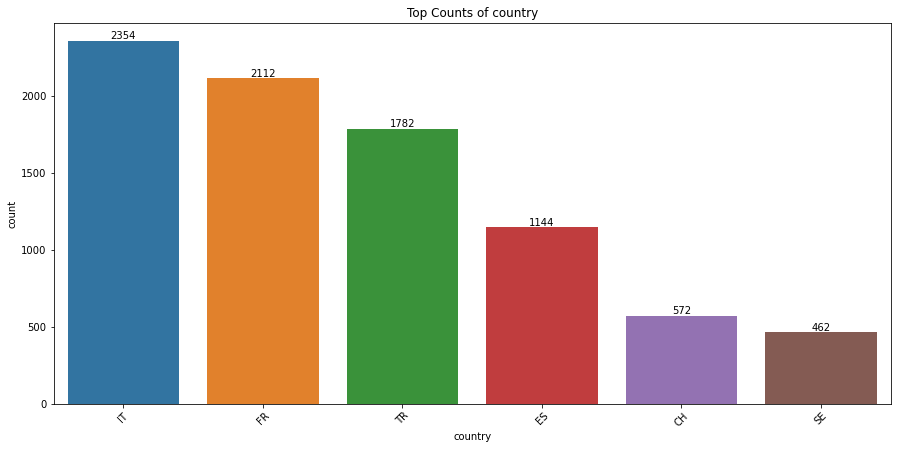

In [22]:
categorical_columns = ['nuts3_name', 'country']

for column in categorical_columns:
    plt.figure(figsize=(15,7))
    # Display the top 20 values by frequency for the 'nuts3_name' column
    if column == 'nuts3_name':
        top_values = stackoverflow_activity[column].value_counts().index[:20]
        ax = sns.countplot(data=stackoverflow_activity[stackoverflow_activity[column].isin(top_values)], x=column, order=top_values)
    else:
        ax = sns.countplot(data=stackoverflow_activity, x=column, order=stackoverflow_activity[column].value_counts().index)
    
    # Annotate bars with their counts
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.title(f'Top Counts of {column}')
    plt.xticks(rotation=45)  # Adjust the rotation angle if needed
    plt.show()


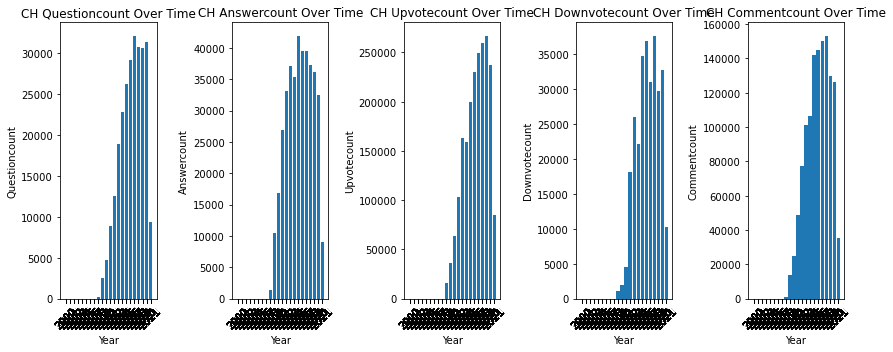

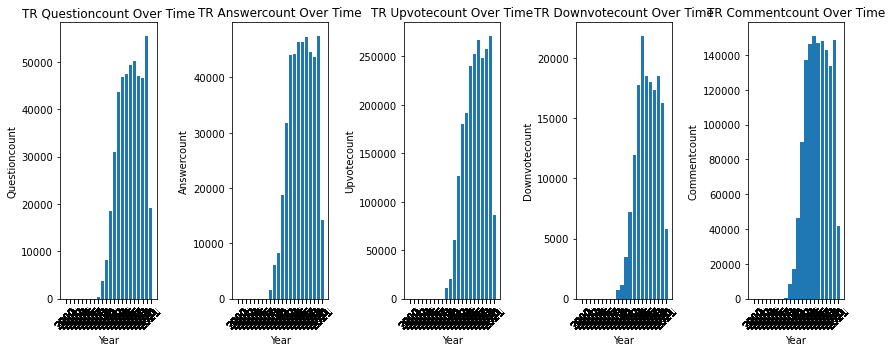

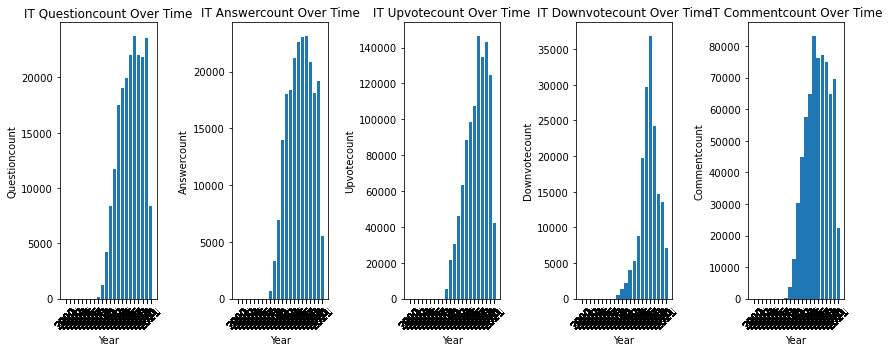

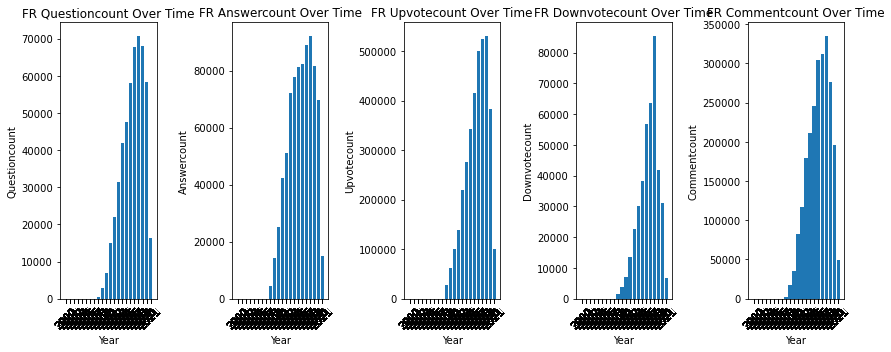

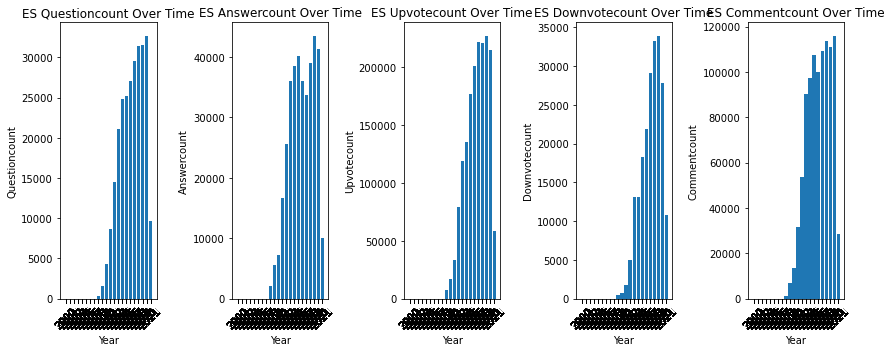

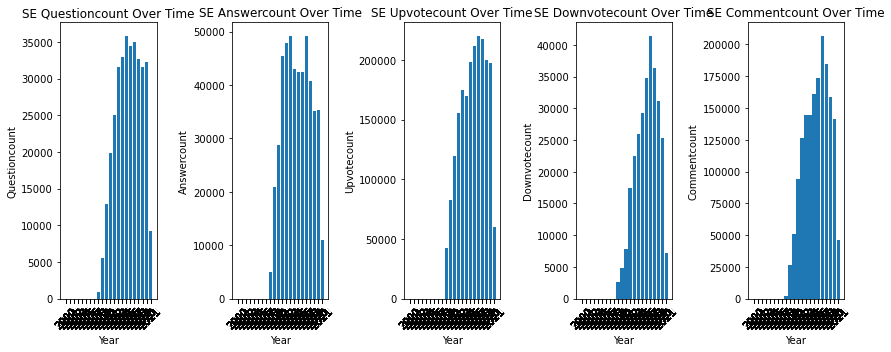

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# List of countries
countries = ['CH', 'TR', 'IT', 'FR', 'ES', 'SE']

# List of columns to visualize
columns = ['questioncount', 'answercount', 'upvotecount', 'downvotecount', 'commentcount']

# Create a separate bar plot for each country and column
for country in countries:
    # Filter the data for the specific country
    country_data = stackoverflow_activity[stackoverflow_activity['country'] == country]
    
    # Create a figure for the current country
    plt.figure(figsize=(12, 5))  # Adjust the figure size as needed
    
    for i, column in enumerate(columns):
        # Create a subplot for the current column
        plt.subplot(1, len(columns), i+1)
        
        # Extract data for the current column
        data = country_data[column]
        
        # Create x-axis labels for years
        years = country_data['year'].astype(int)
        
        # Create a bar plot
        plt.bar(years, data, tick_label=years)
        
        # Set labels and title for the subplot
        plt.xlabel('Year')
        plt.ylabel(column.capitalize())  # Set the column name as the y-axis label
        plt.title(f'{country} {column.capitalize()} Over Time')
        
        # Rotate x-axis labels for better readability (optional)
        plt.xticks(rotation=45)
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the plots for the current country
    plt.show()



In [24]:
# Displaying a table with value counts for nuts3_name
nuts3_counts = stackoverflow_activity['nuts3_name'].value_counts().reset_index()
nuts3_counts.columns = ['nuts3_name', 'count']
print(nuts3_counts)

              nuts3_name  count
0                 Aargau     22
1                 Orense     22
2          Pas-de-Calais     22
3                  Parma     22
4                  Paris     22
..                   ...    ...
378            Gaziantep     22
379                 Gard     22
380            Frosinone     22
381        Fribourg (CH)     22
382  Östergötland County     22

[383 rows x 2 columns]


### Time Series of question count per country:

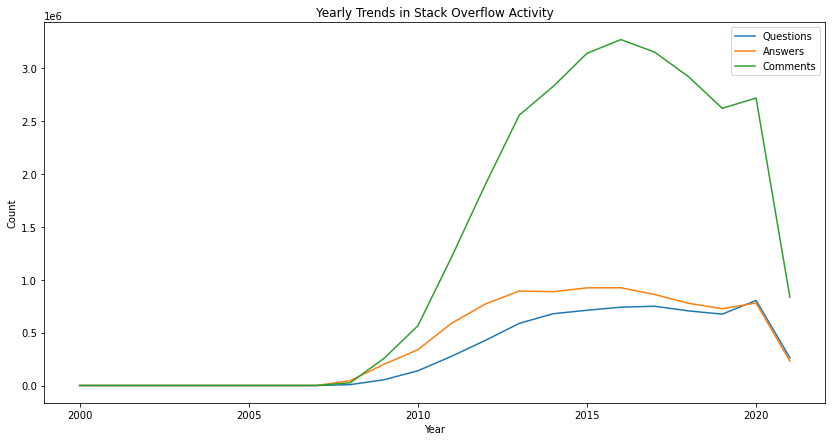

In [25]:
yearly_trends = stackoverflow_activity.groupby('year')[['questioncount', 'answercount', 'commentcount']].sum()
yearly_trends.plot(kind='line', figsize=(14, 7))
plt.title('Yearly Trends in Stack Overflow Activity')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Questions', 'Answers', 'Comments'])
plt.show()

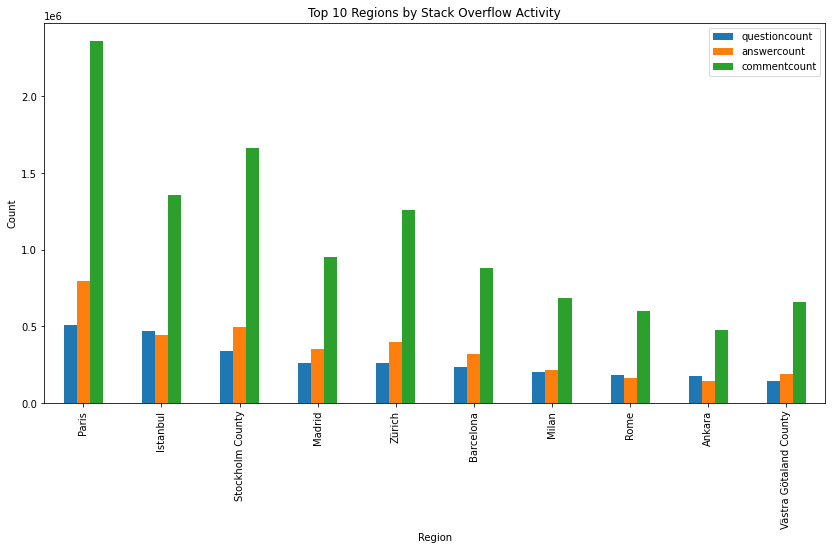

In [26]:
region_activity = stackoverflow_activity.groupby('nuts3_name')[['questioncount', 'answercount', 'commentcount']].sum()
region_activity = region_activity.sort_values('questioncount', ascending=False).head(10)
region_activity.plot(kind='bar', figsize=(14, 7))
plt.title('Top 10 Regions by Stack Overflow Activity')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


In [27]:
# Group by year and country
by_year_country =stackoverflow_activity.groupby(['year','country']).sum().reset_index().iloc[:,:3]
print(by_year_country)

       year country  questioncount
0    2000.0      CH            0.0
1    2000.0      ES            0.0
2    2000.0      FR            0.0
3    2000.0      IT            0.0
4    2000.0      SE            0.0
..      ...     ...            ...
127  2021.0      ES        38651.0
128  2021.0      FR        70875.0
129  2021.0      IT        56270.0
130  2021.0      SE        24198.0
131  2021.0      TR        48873.0

[132 rows x 3 columns]


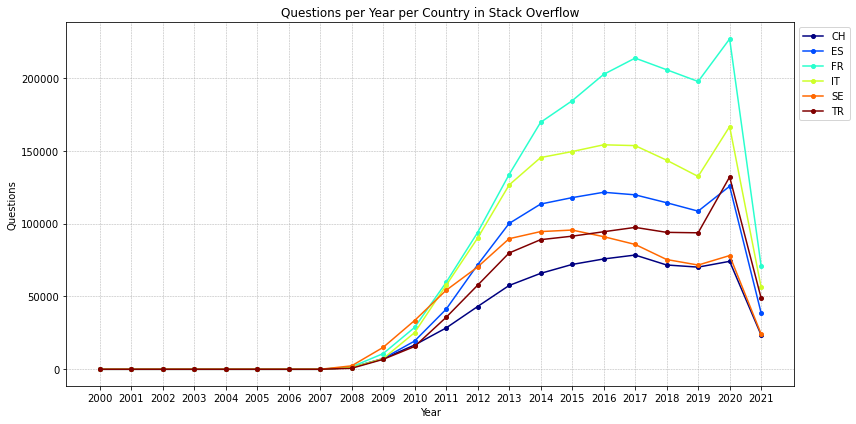

In [28]:
# Create a list of unique countries for colors
countries = by_year_country['country'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(countries)))  # Get a colormap

plt.figure(figsize=(12, 6))

# Plotting each country's time series
for idx, country in enumerate(countries):
    country_data = by_year_country[by_year_country['country'] == country].sort_values('year')
    plt.plot(country_data['year'], country_data['questioncount'], label=country, color=colors[idx], marker='o',markersize=4)

plt.xlabel('Year')
plt.ylabel('Questions')
plt.title('Questions per Year per Country in Stack Overflow')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(by_year_country['year'].unique())  # Only show integer years on the x-axis
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

### Correlation Matrix:

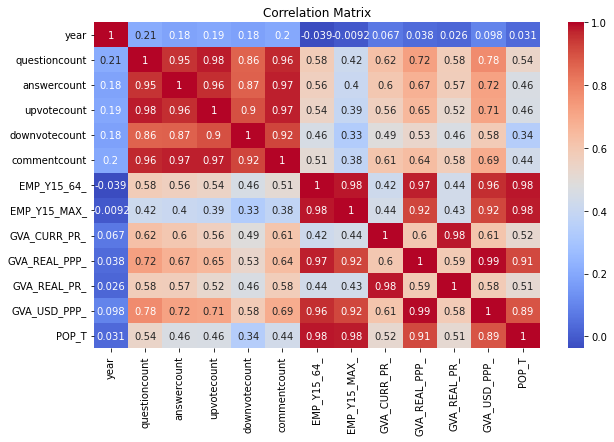

In [29]:
# Correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = stackoverflow_activity.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

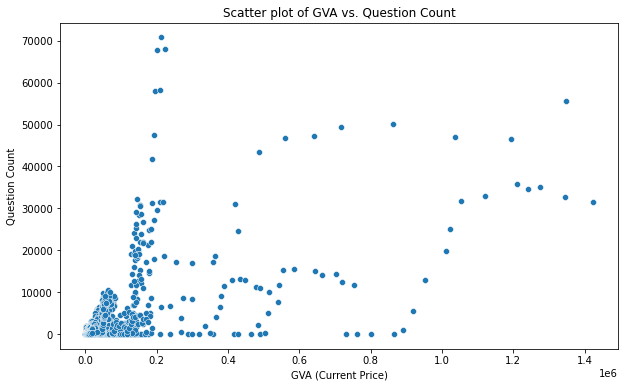

In [30]:
# Scatter plot of GVA_CURR_PR_ vs. questioncount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GVA_CURR_PR_', y='questioncount', data=stackoverflow_activity)
plt.title('Scatter plot of GVA vs. Question Count')
plt.xlabel('GVA (Current Price)')
plt.ylabel('Question Count')
plt.show()


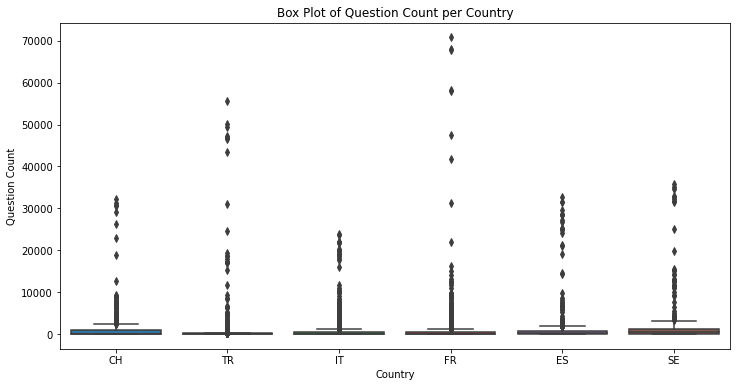

In [31]:
# Box plot of question count per country
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='questioncount', data=stackoverflow_activity)
plt.title('Box Plot of Question Count per Country')
plt.xlabel('Country')
plt.ylabel('Question Count')
plt.show()


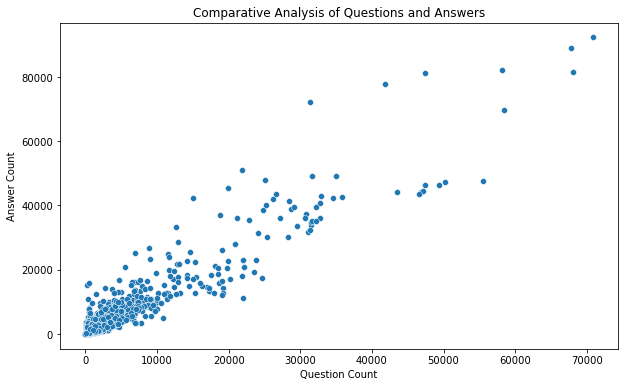

In [32]:
# Scatter plot comparing question count and answer count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='questioncount', y='answercount', data=stackoverflow_activity)
plt.title('Comparative Analysis of Questions and Answers')
plt.xlabel('Question Count')
plt.ylabel('Answer Count')
plt.show()


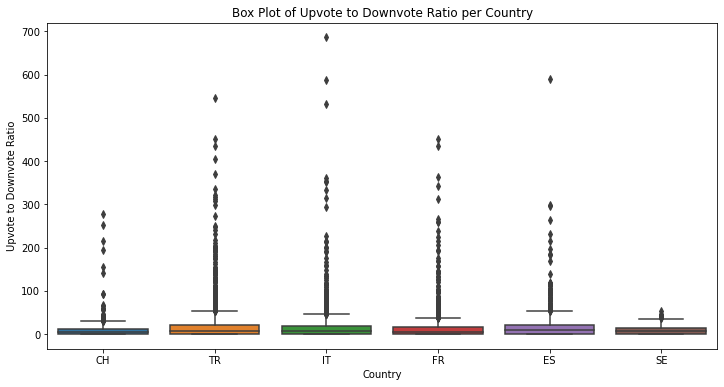

In [33]:
# Calculate the ratio of upvotes to downvotes
stackoverflow_activity['upvote_downvote_ratio'] = stackoverflow_activity['upvotecount'] / (stackoverflow_activity['downvotecount'] + 1)  # Adding 1 to avoid division by zero

# Box plot of the ratio per country
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='upvote_downvote_ratio', data=stackoverflow_activity)
plt.title('Box Plot of Upvote to Downvote Ratio per Country')
plt.xlabel('Country')
plt.ylabel('Upvote to Downvote Ratio')
plt.show()


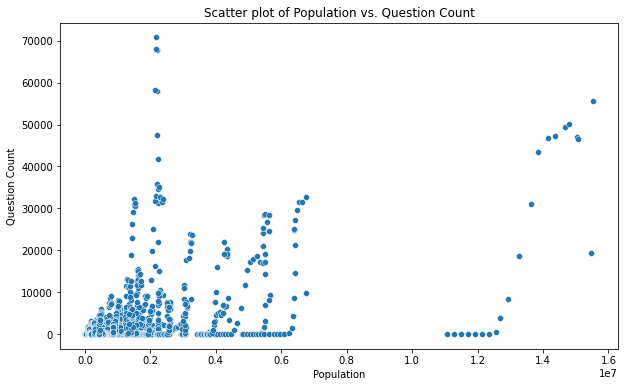

In [34]:
# Scatter plot of Population vs. Question Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='POP_T', y='questioncount', data=stackoverflow_activity)
plt.title('Scatter plot of Population vs. Question Count')
plt.xlabel('Population')
plt.ylabel('Question Count')
plt.show()


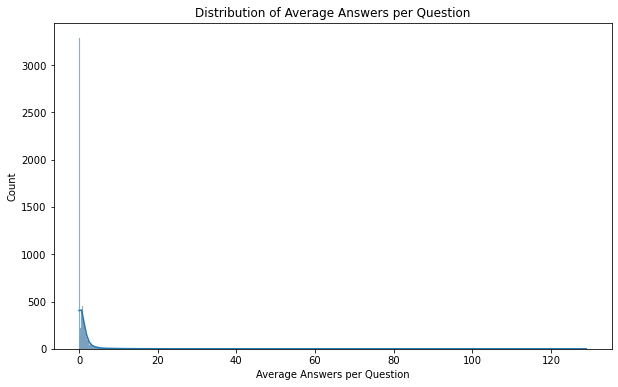

In [35]:
# Calculate average answers per question
stackoverflow_activity['avg_answer_per_question'] = stackoverflow_activity['answercount'] / (stackoverflow_activity['questioncount'] + 1)  # Adding 1 to avoid division by zero

# Histogram of Average Answer per Question
plt.figure(figsize=(10, 6))
sns.histplot(stackoverflow_activity['avg_answer_per_question'], kde=True)
plt.title('Distribution of Average Answers per Question')
plt.xlabel('Average Answers per Question')
plt.show()


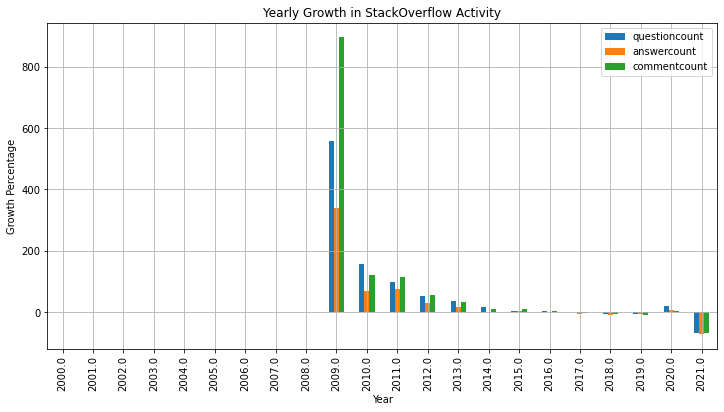

In [36]:
# Calculate yearly growth in activity
yearly_growth = stackoverflow_activity.groupby('year')[['questioncount', 'answercount', 'commentcount']].sum().pct_change() * 100

# Plot
yearly_growth.plot(kind='bar', figsize=(12, 6))
plt.title('Yearly Growth in StackOverflow Activity')
plt.xlabel('Year')
plt.ylabel('Growth Percentage')
plt.grid(True)
plt.show()


# Explore merged_programming_data:

This is a merged dataset containing geographical location data alongside programming activity data, combining information from Stack Overflow with geographical and demographic data.

| **Data** | **Description** |
| --- | --- |
| **posterlocationcity** | The city from which the post was made. |
| **posterlocationregion** | The region within the country from which the post was made. |
| **posterlocationcountrycode** | The country code indicating the country from which the post was made. |
| **nuts3_name** | Refers to the NUTS (Nomenclature of Territorial Units for Statistics) level 3 name, which is a geocode standard by the EU for referencing subdivisions of countries for statistical purposes. |
| **REG_ID** | A unique identifier corresponding to the region. |
| **REG_ID_label_en** | The English label or name of the region corresponding to the REG_ID. |
| **iso3** | The ISO 3-letter code representing the country. |
| **country** | The country to which the data pertains. |
| **country_name** | The full name of the country. |
| **Employment2000**, **Employment2001**, ..., **Employment2021** | Employment data for each respective year from 2000 to 2021. |
| **GVA_CURR_PR2004**, **GVA_CURR_PR2005**, ..., **GVA_CURR_PR2020** | Gross Value Added at current prices for each respective year from 2004 to 2020. GVA is a measure of economic productivity. |
| **GVA_REAL_PPP2004**, **GVA_REAL_PPP2005**, ..., **GVA_REAL_PPP2020** | Gross Value Added adjusted for Purchasing Power Parity for each respective year from 2004 to 2020. |
| **GVA_REAL_PR2004**, **GVA_REAL_PR2005**, ..., **GVA_REAL_PR2020** | GVA at real prices, possibly adjusted for inflation, for each respective year from 2004 to 2020. |
| **GVA_USD_PPP2004**, **GVA_USD_PPP2005**, ..., **GVA_USD_PPP2020** | GVA in USD adjusted for Purchasing Power Parity for each respective year from 2004 to 2020. |
| **OBS_STATUS_EMP2000**, **OBS_STATUS_EMP2001**, ..., **OBS_STATUS_EMP2021** | The observation status of the employment data for each respective year from 2000 to 2021. |
| **OBS_STATUS_GVA2004**, **OBS_STATUS_GVA2005**, ..., **OBS_STATUS_GVA2020** | The observation status of the GVA data for each respective year from 2004 to 2020. |
| **REFERENCEPERIOD** | The reference period for the recorded data. |
| **state** | The state from which the post was made. |
| **city** | The city from which the post was made. This may be redundant with posterlocationcity. |


In [37]:
# Get the first 10 rows of the dataset
merged_programming_data.head(10)

,posterlocationcity,posterlocationregion,posterlocationcountrycode,nuts3_name,REG_ID,REG_ID_label_en,iso3,country,country_name,Employment2000,...,OBS_STATUS_GVA2014,OBS_STATUS_GVA2015,OBS_STATUS_GVA2016,OBS_STATUS_GVA2017,OBS_STATUS_GVA2018,OBS_STATUS_GVA2019,OBS_STATUS_GVA2020,REFERENCEPERIOD,state,city
0,Capdepera,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",Capdepera
1,Costa de la Calma,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",Costa de la Calma
2,Ferreries,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",Ferreries
3,Sant Lluis,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",Sant Lluis
4,ses Salines,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",ses Salines
5,Manacor,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",Manacor
6,Pla de na Tesa,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",Pla de na Tesa
7,Campos,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",Campos
8,Pollença,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",Pollença
9,Port de Pollença,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",Port de Pollença


In [38]:
# Convert the DataFrame columns to a list
columns_list = merged_programming_data.columns.tolist()

# Print each column name
for i, column_name in enumerate(columns_list, start=1):
    print(f"{i}. {column_name}")


1. posterlocationcity
2. posterlocationregion
3. posterlocationcountrycode
4. nuts3_name
5. REG_ID
6. REG_ID_label_en
7. iso3
8. country
9. country_name
10. Employment2000
11. Employment2001
12. Employment2002
13. Employment2003
14. Employment2004
15. Employment2005
16. Employment2006
17. Employment2007
18. Employment2008
19. Employment2009
20. Employment2010
21. Employment2011
22. Employment2012
23. Employment2013
24. Employment2014
25. Employment2015
26. Employment2016
27. Employment2017
28. Employment2018
29. Employment2019
30. Employment2020
31. Employment2021
32. GVA_CURR_PR2004
33. GVA_CURR_PR2005
34. GVA_CURR_PR2006
35. GVA_CURR_PR2007
36. GVA_CURR_PR2008
37. GVA_CURR_PR2009
38. GVA_CURR_PR2010
39. GVA_CURR_PR2011
40. GVA_CURR_PR2012
41. GVA_CURR_PR2013
42. GVA_CURR_PR2014
43. GVA_CURR_PR2015
44. GVA_CURR_PR2016
45. GVA_CURR_PR2017
46. GVA_CURR_PR2018
47. GVA_CURR_PR2019
48. GVA_CURR_PR2020
49. GVA_REAL_PPP2004
50. GVA_REAL_PPP2005
51. GVA_REAL_PPP2006
52. GVA_REAL_PPP2007
53. G

In [39]:
merged_programming_data

,posterlocationcity,posterlocationregion,posterlocationcountrycode,nuts3_name,REG_ID,REG_ID_label_en,iso3,country,country_name,Employment2000,...,OBS_STATUS_GVA2014,OBS_STATUS_GVA2015,OBS_STATUS_GVA2016,OBS_STATUS_GVA2017,OBS_STATUS_GVA2018,OBS_STATUS_GVA2019,OBS_STATUS_GVA2020,REFERENCEPERIOD,state,city
0,Capdepera,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",Capdepera
1,Costa de la Calma,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",Costa de la Calma
2,Ferreries,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",Ferreries
3,Sant Lluis,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",Sant Lluis
4,ses Salines,"Balearic Islands,Balearic Islands",ES,Balearic Islands,,,,ES,,NaN,...,,,,,,,,,"Balearic Islands,Balearic Islands",ses Salines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,Vilaflor,"Canary Islands,Santa Cruz de Tenerife",ES,Tenerife,ES709,Tenerife,ESP,ES,Spain,NaN,...,NA,NA,NA,NA,NA,P,,2015,"Canary Islands,Santa Cruz de Tenerife",Vilaflor
2977,Icod de los Vinos,"Canary Islands,Santa Cruz de Tenerife",ES,Tenerife,ES709,Tenerife,ESP,ES,Spain,NaN,...,NA,NA,NA,NA,NA,P,,2015,"Canary Islands,Santa Cruz de Tenerife",Icod de los Vinos
2978,Puerto de Santiago,"Canary Islands,Santa Cruz de Tenerife",ES,Tenerife,ES709,Tenerife,ESP,ES,Spain,NaN,...,NA,NA,NA,NA,NA,P,,2015,"Canary Islands,Santa Cruz de Tenerife",Puerto de Santiago
2979,San Sebastián de La Gomera,"Canary Islands,Santa Cruz de Tenerife",ES,Tenerife,ES709,Tenerife,ESP,ES,Spain,NaN,...,NA,NA,NA,NA,NA,P,,2015,"Canary Islands,Santa Cruz de Tenerife",San Sebastián de La Gomera


###  EMPLOYMENT RATE OVER THE YEARS

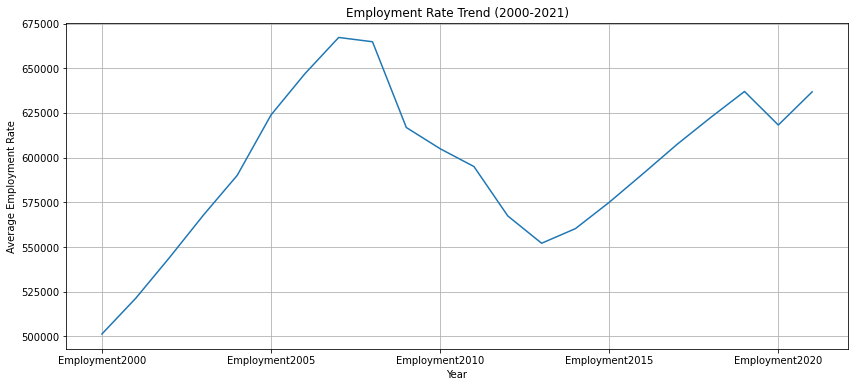

In [40]:
employment_cols = [f"Employment{year}" for year in range(2000, 2022)]
employment_trend = merged_programming_data[employment_cols].mean()

plt.figure(figsize=(14, 6))
employment_trend.plot(kind='line')
plt.title('Employment Rate Trend (2000-2021)')
plt.xlabel('Year')
plt.ylabel('Average Employment Rate')
plt.grid(True)
plt.show()

### GVA ANALYSIS

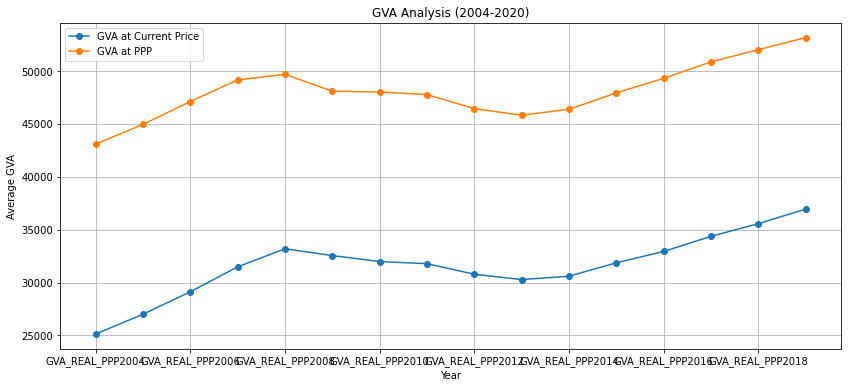

In [41]:
gva_cols_curr = [f"GVA_CURR_PR{year}" for year in range(2004, 2021)]
gva_cols_ppp = [f"GVA_REAL_PPP{year}" for year in range(2004, 2021)]
gva_curr = merged_programming_data[gva_cols_curr].mean()
gva_ppp = merged_programming_data[gva_cols_ppp].mean()

plt.figure(figsize=(14, 6))
gva_curr.plot(label='GVA at Current Price', linestyle='-', marker='o')
gva_ppp.plot(label='GVA at PPP', linestyle='-', marker='o')
plt.title('GVA Analysis (2004-2020)')
plt.xlabel('Year')
plt.ylabel('Average GVA')
plt.legend()
plt.grid(True)
plt.show()

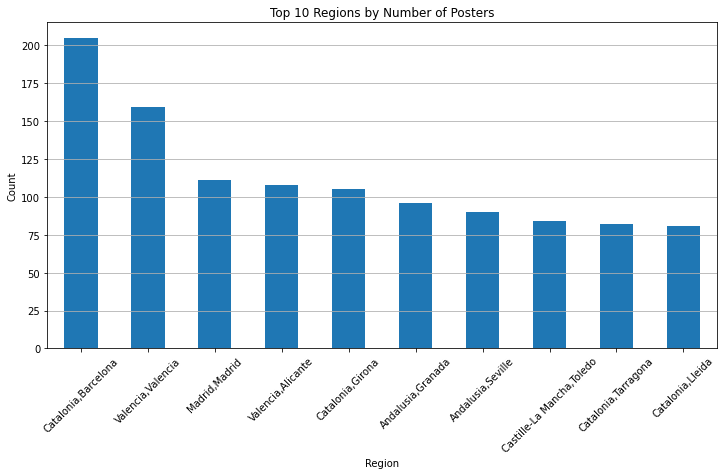

In [42]:
poster_region_count = merged_programming_data['posterlocationregion'].value_counts()

plt.figure(figsize=(12, 6))
poster_region_count.head(10).plot(kind='bar')
plt.title('Top 10 Regions by Number of Posters')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


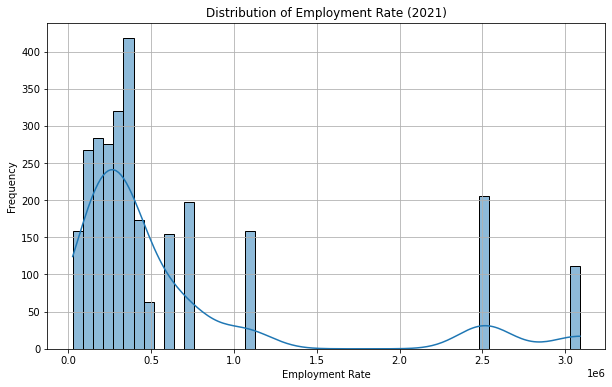

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_programming_data['Employment2021'], kde=True)
plt.title('Distribution of Employment Rate (2021)')
plt.xlabel('Employment Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


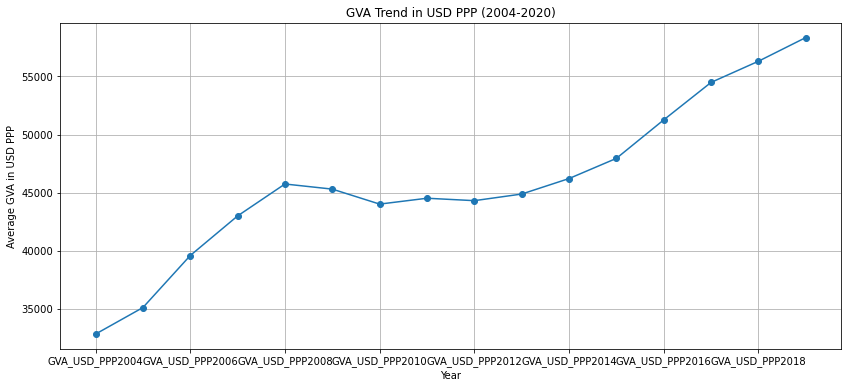

In [44]:
gva_cols_usd_ppp = [f"GVA_USD_PPP{year}" for year in range(2004, 2021)]
gva_usd_ppp = merged_programming_data[gva_cols_usd_ppp].mean()

plt.figure(figsize=(14, 6))
gva_usd_ppp.plot(kind='line', linestyle='-', marker='o')
plt.title('GVA Trend in USD PPP (2004-2020)')
plt.xlabel('Year')
plt.ylabel('Average GVA in USD PPP')
plt.grid(True)
plt.show()


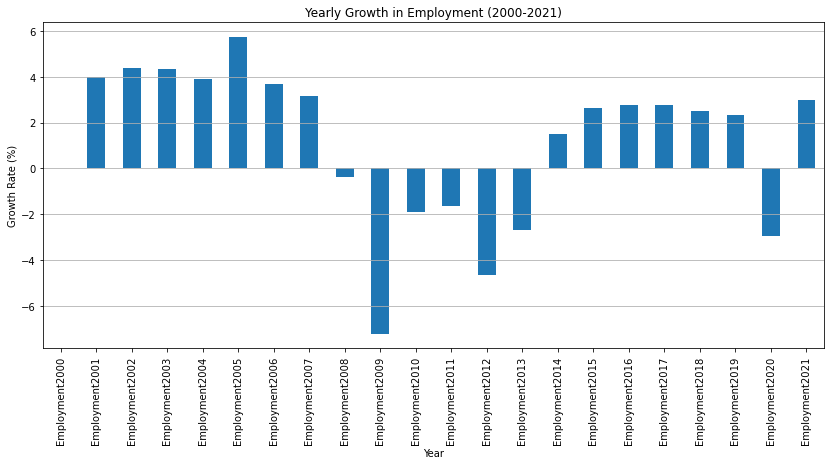

In [45]:
employment_cols = [f"Employment{year}" for year in range(2000, 2022)]
employment_growth = merged_programming_data[employment_cols].mean().pct_change() * 100

plt.figure(figsize=(14, 6))
employment_growth.plot(kind='bar')
plt.title('Yearly Growth in Employment (2000-2021)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(axis='y')
plt.show()


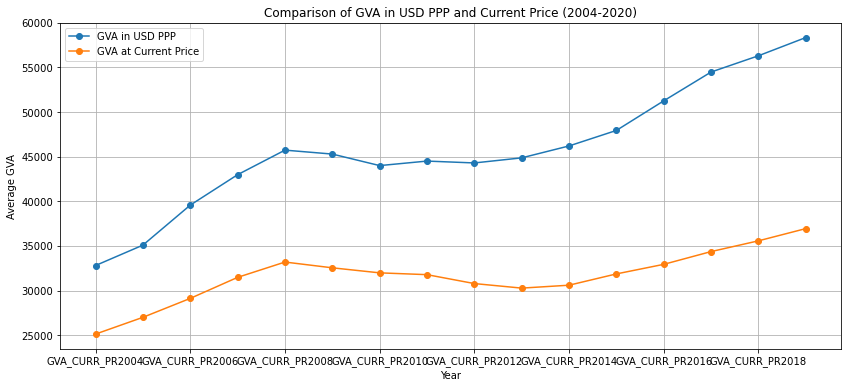

In [46]:
gva_cols_usd_ppp = [f"GVA_USD_PPP{year}" for year in range(2004, 2021)]
gva_cols_curr = [f"GVA_CURR_PR{year}" for year in range(2004, 2021)]

gva_usd_ppp_mean = merged_programming_data[gva_cols_usd_ppp].mean()
gva_curr_mean = merged_programming_data[gva_cols_curr].mean()

plt.figure(figsize=(14, 6))
gva_usd_ppp_mean.plot(label='GVA in USD PPP', linestyle='-', marker='o')
gva_curr_mean.plot(label='GVA at Current Price', linestyle='-', marker='o')
plt.title('Comparison of GVA in USD PPP and Current Price (2004-2020)')
plt.xlabel('Year')
plt.ylabel('Average GVA')
plt.legend()
plt.grid(True)
plt.show()


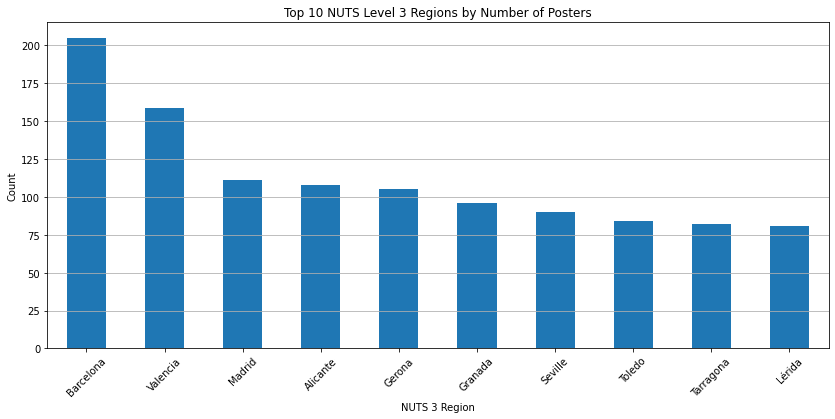

In [47]:
plt.figure(figsize=(14, 6))
merged_programming_data['nuts3_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 NUTS Level 3 Regions by Number of Posters')
plt.xlabel('NUTS 3 Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


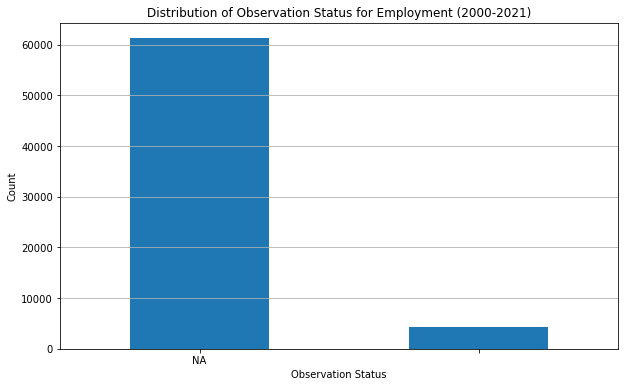

In [48]:
obs_status_cols = [f"OBS_STATUS_EMP{year}" for year in range(2000, 2022)]
obs_status = merged_programming_data[obs_status_cols].apply(pd.Series.value_counts).sum(axis=1)

plt.figure(figsize=(10, 6))
obs_status.plot(kind='bar')
plt.title('Distribution of Observation Status for Employment (2000-2021)')
plt.xlabel('Observation Status')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


# Linear Regression

In [49]:
# Original number of rows
original_rows = len(stackoverflow_activity)

# Number of rows after dropping NaN values
cleaned_rows = len(stackoverflow_activity.dropna(subset=['EMP_Y15_64_', 'GVA_CURR_PR_', 'POP_T', 'questioncount']))

# Calculate and print the number of rows dropped
dropped_rows = original_rows - cleaned_rows
print(f"Original rows: {original_rows}")
print(f"Rows after cleaning: {cleaned_rows}")
print(f"Number of rows dropped: {dropped_rows}")


Original rows: 8426
Rows after cleaning: 2806
Number of rows dropped: 5620


Dropping the rows with the missing data results in an inmense loss of data (more than half of it). Suggestion is to explore imputation strategies to avoid losing such a significative amount of data entries.

**Continuing without dropping values**

In [50]:
# Drop rows containing NaN values
cleaned_data = stackoverflow_activity.dropna(subset=['GVA_CURR_PR_', 'EMP_Y15_64_', 'POP_T', 'questioncount'])


In [51]:
# Choose independent variables (X) and the dependent variable (y)
X = cleaned_data[['GVA_CURR_PR_', 'EMP_Y15_64_', 'POP_T']]
y = cleaned_data['questioncount']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 3800511.397668808


In [52]:
print('Variance of questioncount:', y.var())

Variance of questioncount: 11895643.637055898


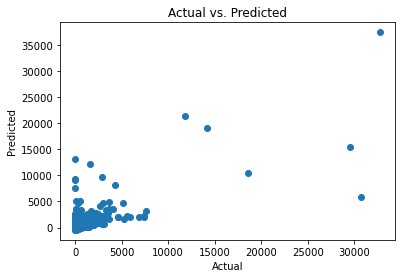

In [53]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


In [54]:
print('Coefficients:', model.coef_)


Coefficients: [0.02538746 0.00011112 0.00162628]


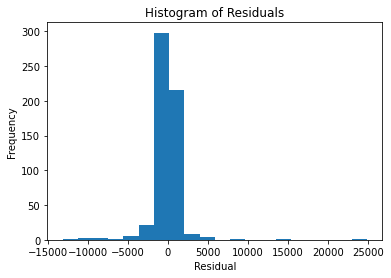

In [55]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [56]:
from sklearn.model_selection import cross_val_score

# Compute the cross-validated MSE
cv_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

# Convert to positive and take the average
mean_cv_mse = -cv_mse.mean()
print('Cross-validated Mean Squared Error:', mean_cv_mse)


Cross-validated Mean Squared Error: 5133665.687002038
